In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
def __readheader(filehandle, numberheaderlines=1):
    """Reads the specified number of lines and returns the comma-delimited 
    strings on each line as a list"""
    for _ in range(numberheaderlines):
        yield map(str.strip, filehandle.readline().strip().split(' '))

with open('../data/processed/SouthGermanCredit.asc', 'r') as rh:
    # Single header line
    A = next(__readheader(rh))
    head = (list(A))
    datanp = np.genfromtxt(rh, delimiter=' ')
    #for headerline in __readheader(rh, numberheaderlines=2):
        #print(list(headerline)) 

    # Multiple header lines
    #for headerline in __readheader(rh, numberheaderlines=2):
     #   print headerline  # Or do other stuff with headerline tokens


#data = pd.DataFrame(datanp, columns = list(A))
data = pd.DataFrame(datanp, columns=head)

In [3]:
data

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1.0,18.0,4.0,2.0,1049.0,1.0,2.0,4.0,2.0,1.0,...,2.0,21.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1,1.0,9.0,4.0,0.0,2799.0,1.0,3.0,2.0,3.0,1.0,...,1.0,36.0,3.0,1.0,2.0,3.0,1.0,1.0,2.0,1.0
2,2.0,12.0,2.0,9.0,841.0,2.0,4.0,2.0,2.0,1.0,...,1.0,23.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0
3,1.0,12.0,4.0,0.0,2122.0,1.0,3.0,3.0,3.0,1.0,...,1.0,39.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0
4,1.0,12.0,4.0,0.0,2171.0,1.0,3.0,4.0,3.0,1.0,...,2.0,38.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,1.0,24.0,2.0,3.0,1987.0,1.0,3.0,2.0,3.0,1.0,...,1.0,21.0,3.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0
984,1.0,24.0,2.0,0.0,2303.0,1.0,5.0,4.0,3.0,2.0,...,1.0,45.0,3.0,2.0,1.0,3.0,2.0,1.0,2.0,0.0
985,4.0,21.0,4.0,0.0,12680.0,5.0,5.0,4.0,3.0,1.0,...,4.0,30.0,3.0,3.0,1.0,4.0,2.0,2.0,2.0,0.0
986,2.0,12.0,2.0,3.0,6468.0,5.0,1.0,2.0,3.0,1.0,...,4.0,52.0,3.0,2.0,1.0,4.0,2.0,2.0,2.0,0.0


<AxesSubplot:>

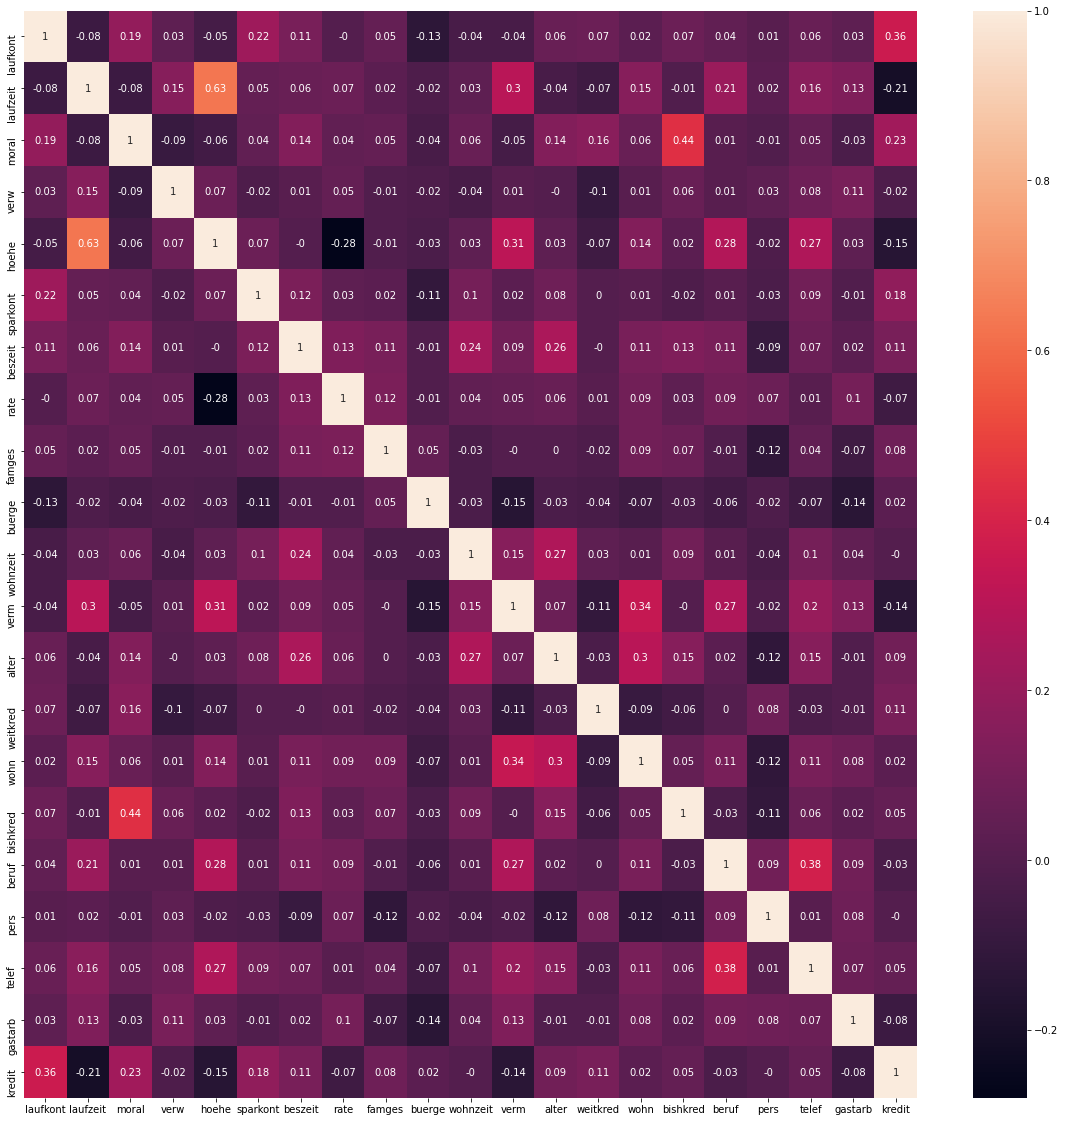

In [5]:
correlation_matrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(data=correlation_matrix, annot = True)

In [ ]:
#Ob es ein gute Kredit ist oder nicht ist mit folgende Faktoren gebunden:
#gute Kredit: Laufkonto, moral, sparkonto, beszeit und weitere Kredit. Weitere Kredit ist wiederrum mit moral in Korrelation und Sparkonto mit laufkonto und beszeit. beszeit mit Alter und Wohnzeit; Laufkonto, Sparkonto und Moral sind auch zusammen gebunden. In Allgemein kann man sagen das ein gute Kredit ist mit diese Verbunden: Laufkonto, moral und beszeit. Man kann es auch in Verbindung mit diese rauskriegen: Laufkonto, moral, Alter und Wohnzeit.
#schlechte Kredit: Laufzeit, höhe und Vermögen. Laufzeit ist wiederrum in Korrelation mit Höhe, Vermögen, Beruf, wohn und Verwendung in Korrelation. Höhe mit Beruf und Vermögen, und Vermögen mit Beruf, wohn und Wohnzeit. Zusammengefasst, ein schlechte Kredit ist in zusammenhang mit Höhe, Vermögen, Beruf, wohn, Wohnzeit, Verwendung und eventuell auch gestarb. Man kann es auch mit Laufzeit verbinden aber es ist auch in andere Faktoren versteckt. Wohnzeit ist in gute sowie schlechte Kredit present.

Text(0, 0.5, 'number of instances')

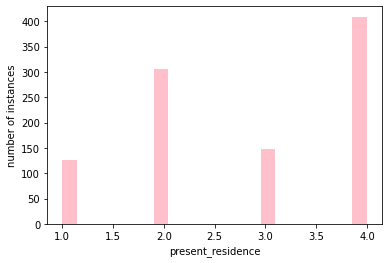

In [6]:
x_variable = data['wohnzeit']
plt.hist(x_variable, color = "pink", rwidth=0.95, bins = 20)
plt.xlabel('present_residence')
plt.ylabel('number of instances')

Text(0, 0.5, 'Number of instances')

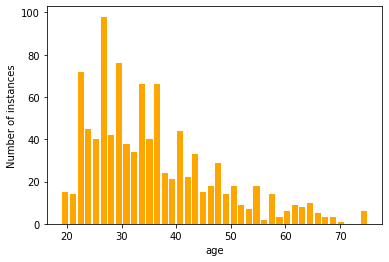

In [10]:
#y_variable = data['hoehe']
#y_variable = data['laufkont']
y_variable = data['alter']

#plot histogram
plt.hist(y_variable, color = "orange", rwidth=0.8, bins = 40)

#name for x-axis 
#plt.xlabel('amount of Credit')
#plt.xlabel('account status')
plt.xlabel('age')

#name for y-axis 
plt.ylabel('Number of instances')

Text(0.5, 0, 'Amount of credit')

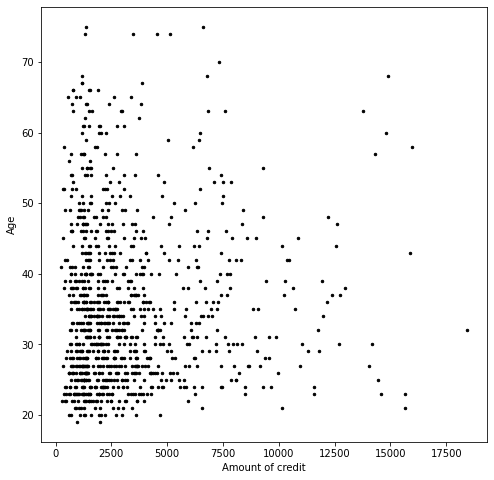

In [11]:
x_variable = data['hoehe']
y_variable = data['alter']
#definiton of figure size for the plot
fig=plt.figure(figsize=(8, 8))

#display scatter plot 
plt.scatter(x_variable, y_variable,  marker='o', s=6, color = "black")

#name y-axis
plt.ylabel('Age')

#name x-axis
plt.xlabel('Amount of credit')

In [43]:
data_good = pd.DataFrame()
data_bad = pd.DataFrame()
for i in range(0,len(data)):
    datai = pd.DataFrame(list((map(float,data.loc[i]))))
    data_row = datai.T
    if data['kredit'][i] == 1.0: data_good = data_good.append(data_row)
    if data['kredit'][i] == 0.0: data_bad = data_bad.append(data_row)
data_good.columns = data.columns
data_bad.columns = data.columns

Text(0.5, 0, 'Amount of credit')

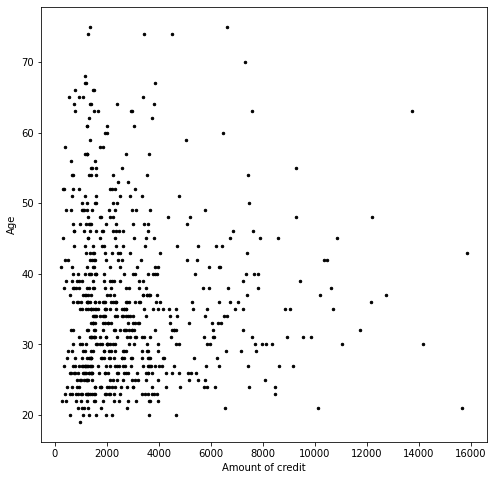

In [44]:
x_variable = data_good['hoehe']
y_variable = data_good['alter']
#definiton of figure size for the plot
fig=plt.figure(figsize=(8, 8))

#display scatter plot 
plt.scatter(x_variable, y_variable,  marker='o', s=6, color = "black")

#name y-axis
plt.ylabel('Age')

#name x-axis
plt.xlabel('Amount of credit')

Text(0.5, 0, 'Amount of credit')

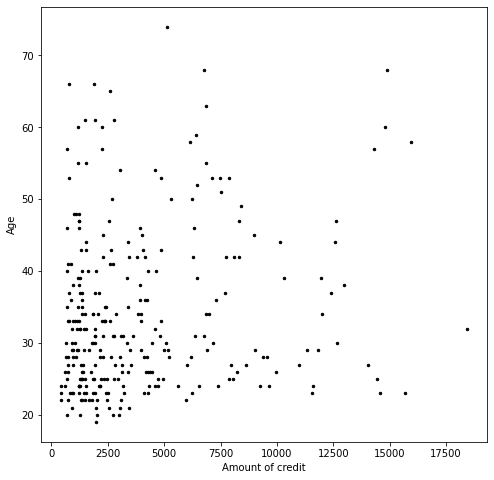

In [45]:
x_variable = data_bad['hoehe']
y_variable = data_bad['alter']
#definiton of figure size for the plot
fig=plt.figure(figsize=(8, 8))

#display scatter plot 
plt.scatter(x_variable, y_variable,  marker='o', s=6, color = "black")

#name y-axis
plt.ylabel('Age')

#name x-axis
plt.xlabel('Amount of credit')

In [ ]:
self.probs=self.dt_train.predict_proba(X_test) 
self.probs = self.probs[:, 1] 
self.auc = roc_auc_score(y_test, self.probs)
 print('AUC: %.2f' % self.auc) 
 self.fpr, self.tpr, self.thresholds = roc_curve(y_test, self.probs) # def plot_roc_curve(fpr, tpr): plt.plot(self.fpr, self.tpr, color='orange', label='ROC') plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--') plt.xlabel('False Positive Rate') plt.ylabel('True Positive Rate') plt.title('Receiver Operating Characteristic (ROC) Curve') plt.legend() #plt.show() #plot_roc_curve(self.fpr, self.tpr) plt.savefig('Figuren/roc_Dectree.png', bbox_inches='tight') 